In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [3]:
df = pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

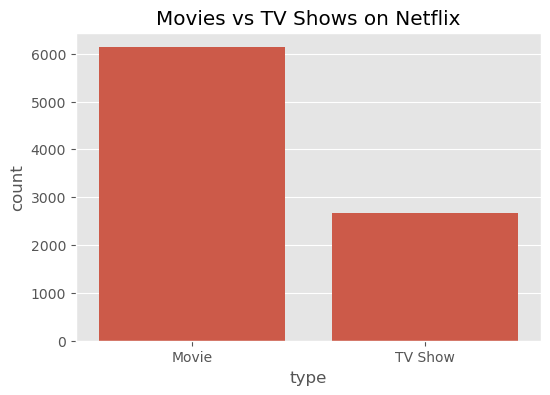

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows on Netflix")
plt.show()

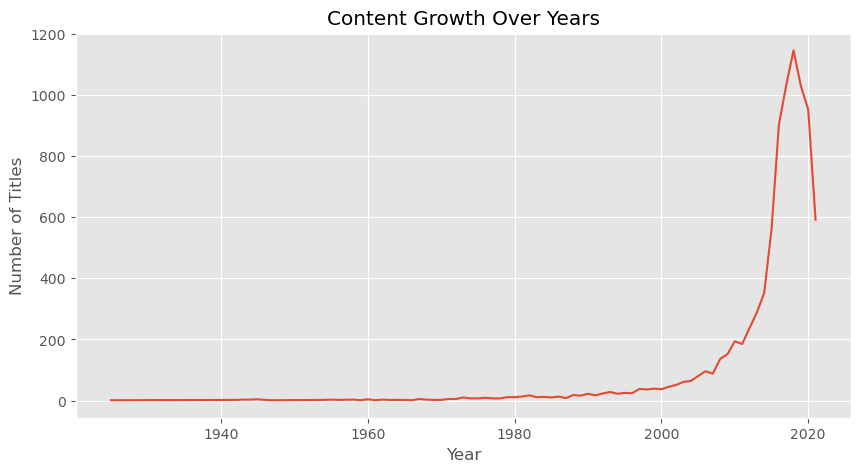

In [9]:
plt.figure(figsize=(10,5))
df['release_year'].value_counts().sort_index().plot()
plt.title("Content Growth Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

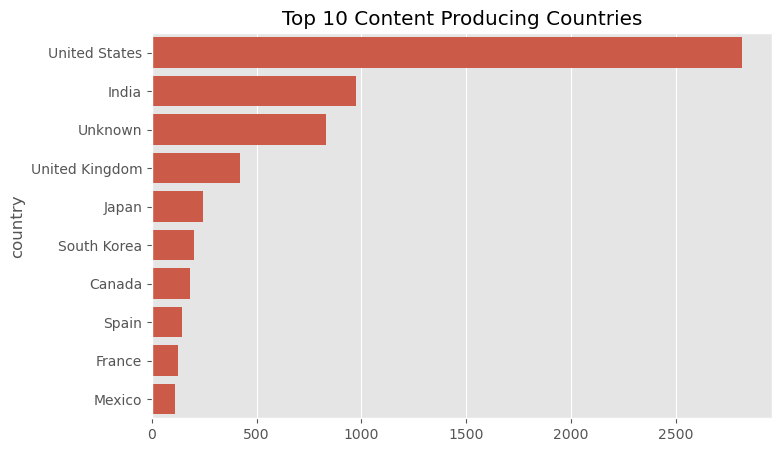

In [10]:
top_country = df['country'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_country.values, y=top_country.index)
plt.title("Top 10 Content Producing Countries")
plt.show()

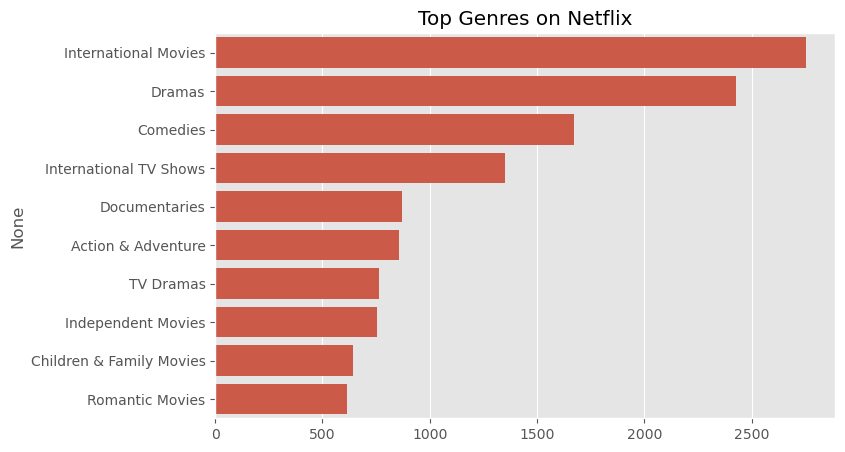

In [11]:
genre = df['listed_in'].str.split(',', expand=True).stack().str.strip()
top_genre = genre.value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_genre.values, y=top_genre.index)
plt.title("Top Genres on Netflix")
plt.show()

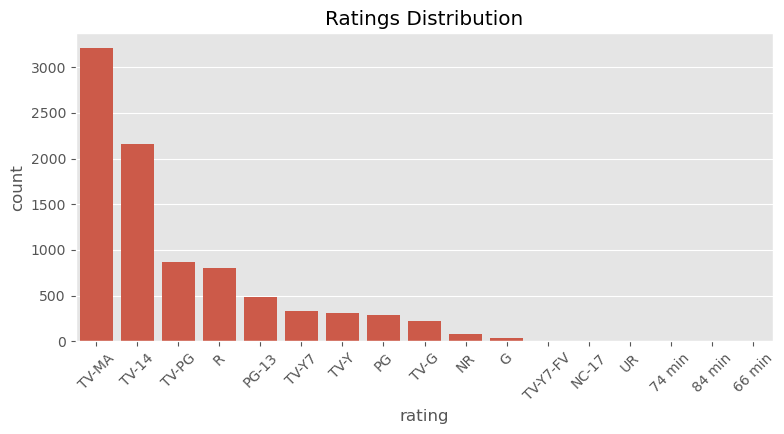

In [12]:
plt.figure(figsize=(9,4))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Ratings Distribution")
plt.show()

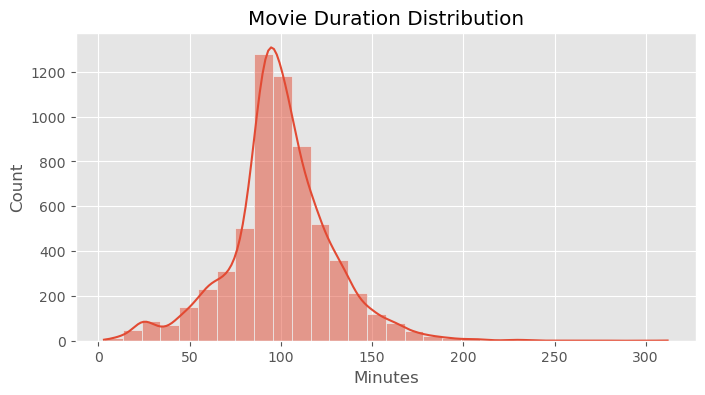

In [13]:
movies = df[df['type']=='Movie'].copy()
movies['duration'] = movies['duration'].str.replace(' min','').astype(float)

plt.figure(figsize=(8,4))
sns.histplot(movies['duration'], bins=30, kde=True)
plt.title("Movie Duration Distribution")
plt.xlabel("Minutes")
plt.show()

In [14]:
print("Total Titles:", len(df))
print("Total Movies:", len(df[df['type']=='Movie']))
print("Total TV Shows:", len(df[df['type']=='TV Show']))
print("Top Country:", df['country'].value_counts().idxmax())
print("Most Common Rating:", df['rating'].mode()[0])

Total Titles: 8807
Total Movies: 6131
Total TV Shows: 2676
Top Country: United States
Most Common Rating: TV-MA
